In [2]:
"""
Boston Airbnb df transformation, analysis and blog post

Questions that will be explored:
1. What percentage of hosts are superhosts?
2. How does the average nightly price vary by bedroom?
3. How does the average nightly price vary by neighborhood?
4. Can the average nightly price be predicted based on certain variables?
"""

# Module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [3]:
# Load data from csv file using pd.read_csv() and visualize columns in data set
df = pd.read_csv('C:/Users/MLevanduski/Desktop/Data Science Udacity/Blog Post Lesson 1/Boston/listings.csv')
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [4]:
# Find which columns contain no null values
no_nulls = set(df.columns[df.isnull().mean()==0])
print(no_nulls)

{'accommodates', 'host_has_profile_pic', 'longitude', 'amenities', 'host_id', 'price', 'requires_license', 'host_since', 'require_guest_profile_picture', 'listing_url', 'availability_90', 'description', 'host_identity_verified', 'latitude', 'maximum_nights', 'host_is_superhost', 'host_total_listings_count', 'minimum_nights', 'last_scraped', 'extra_people', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'room_type', 'street', 'name', 'neighbourhood_cleansed', 'cancellation_policy', 'availability_30', 'smart_location', 'host_listings_count', 'country_code', 'id', 'host_picture_url', 'calculated_host_listings_count', 'picture_url', 'calendar_updated', 'host_verifications', 'country', 'require_guest_phone_verification', 'is_location_exact', 'instant_bookable', 'host_url', 'experiences_offered', 'host_thumbnail_url', 'scrape_id', 'bed_type', 'availability_60', 'host_name', 'guests_included', 'state'}


In [5]:
# Find which columns have less than 10% missing values
low_missing_cols = set(df.columns[df.isnull().mean() < 0.10])
print(low_missing_cols)

{'accommodates', 'host_has_profile_pic', 'longitude', 'amenities', 'host_id', 'price', 'availability_60', 'requires_license', 'host_since', 'require_guest_profile_picture', 'listing_url', 'availability_90', 'description', 'host_identity_verified', 'latitude', 'host_neighbourhood', 'maximum_nights', 'host_is_superhost', 'host_total_listings_count', 'minimum_nights', 'last_scraped', 'extra_people', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'room_type', 'summary', 'street', 'zipcode', 'bedrooms', 'name', 'neighbourhood_cleansed', 'cancellation_policy', 'availability_30', 'smart_location', 'host_listings_count', 'country_code', 'id', 'host_picture_url', 'city', 'beds', 'calculated_host_listings_count', 'picture_url', 'calendar_updated', 'host_verifications', 'country', 'require_guest_phone_verification', 'is_location_exact', 'instant_bookable', 'host_url', 'experiences_offered', 'host_thumbnail_url', 'market', 'scrape_id', 'host_location', 'property_type', 'bathroom

In [6]:
# Find which columns have 50% missing values
mid_missing_cols = set(df.columns[df.isnull().mean() > 0.50])
print(mid_missing_cols)

{'has_availability', 'neighbourhood_group_cleansed', 'monthly_price', 'security_deposit', 'license', 'jurisdiction_names', 'notes', 'weekly_price', 'square_feet'}


In [7]:
# Find which columns have 75% missing values (will not use these columns since vast majority of data missing)
high_missing_cols = set(df.columns[df.isnull().mean() > 0.75])
print(high_missing_cols)

{'has_availability', 'neighbourhood_group_cleansed', 'monthly_price', 'license', 'jurisdiction_names', 'weekly_price', 'square_feet'}


In [8]:
"""
Question 1 Number of superhosts
"""

# Find number of superhosts (True == t)
superhost_num = df[df['host_is_superhost'] == 't']['host_is_superhost'].value_counts().sum()
# Find total number of hosts
total_hosts = len(df['host_is_superhost'])
# Calculate percentage of superhosts in Boston
percent_superhost = superhost_num/total_hosts
print(f'The percentage of superhosts in Boston airbnb market are {percent_superhost*100}% of all hosts')

The percentage of superhosts in Boston airbnb market are 11.352859135285913% of all hosts


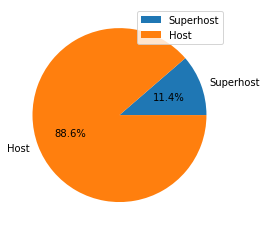

In [9]:
# Create pie chart of superhost vs host
percent_host = (1-percent_superhost)
host_array = np.array([percent_superhost, percent_host])
plt.pie(host_array, labels = ['Superhost','Host'], autopct='%1.1f%%');
plt.legend();
plt.savefig('superhost_pie.png', dpi=300, bbox_inches='tight')

In [10]:
'''
Question 2 Number of bedroom influence on average nightly price
''' 

# Determine the number of null values in 'bedrooms' column and the most common number of bedrooms
nan_bedrooms = df['bedrooms'].isnull().mean()
print(f"The percent of nan values in 'bedrooms' column is {nan_bedrooms*100}%")
df['bedrooms'].value_counts()

The percent of nan values in 'bedrooms' column is 0.2789400278940028%


1.0    2379
2.0     693
0.0     287
3.0     155
4.0      45
5.0      16
Name: bedrooms, dtype: int64

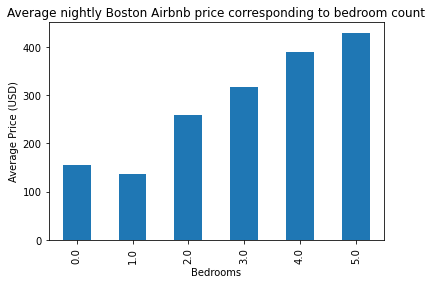

In [11]:
# Given extremely low nan values comfortable to dropna in 'bedrooms' column. Could have also imputed 1 bedroom since most common value
bedrooms_df = df.dropna(subset=['bedrooms'], axis=0)

#Convert price to float using regular expresions and .astype() method
df_pricetype = bedrooms_df.copy()
df_pricetype['price'] = df_pricetype['price'].replace({'\$': '',',':''}, regex = True).astype(float)
df_pricetype.groupby(['bedrooms']).mean()['price'].plot(kind = 'bar');
plt.title('Average nightly Boston Airbnb price corresponding to bedroom count');
plt.ylabel('Average Price (USD)');
plt.xlabel('Bedrooms');
plt.savefig('bedrooms.png', dpi=300, bbox_inches='tight')

In [12]:
# Get view of data in chart above
df_pricetype.groupby(['bedrooms']).mean()['price']

bedrooms
0.0    154.668990
1.0    136.285834
2.0    258.753247
3.0    316.419355
4.0    389.400000
5.0    429.000000
Name: price, dtype: float64

In [13]:
'''
Question 3 - Average nightly price by neighbourhood
'''

# Check nan values in neighbourhood column
nan_neighbourhood = df_pricetype['neighbourhood'].isnull().mean()
print(f"The percent of nan values in 'neighbourhood' column is {nan_neighbourhood*100}%")

The percent of nan values in 'neighbourhood' column is 15.188811188811188%


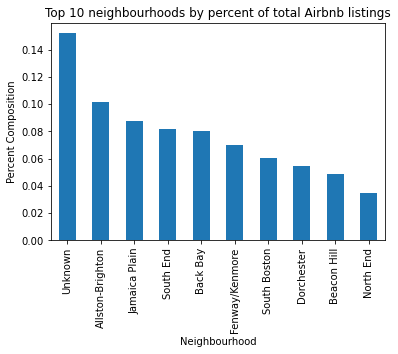

In [14]:
# Top 10 neighborhoods and percent composition of respective listings
df_nb = df_pricetype.copy()

# 15% is a significant amount of nan's, given categorical data will create an impute identifier called 'Unknown'. 
df_nb['neighbourhood'].fillna('Unknown',inplace=True)

# Counting listings per neighbourhood
count_nb = df_nb['neighbourhood'].value_counts()

# Taking top 10 neighbourhoods and normalizing against total listings to get top 10 neighborhoods by percent of total listings
(count_nb[:10]/df_nb.shape[0]).plot(kind='bar');
plt.title('Top 10 neighbourhoods by percent of total Airbnb listings');
plt.xlabel('Neighbourhood');
plt.ylabel('Percent Composition');
plt.savefig('.png', dpi=300, bbox_inches='tight')
plt.savefig('listing_volume_location.png', dpi=300, bbox_inches='tight')

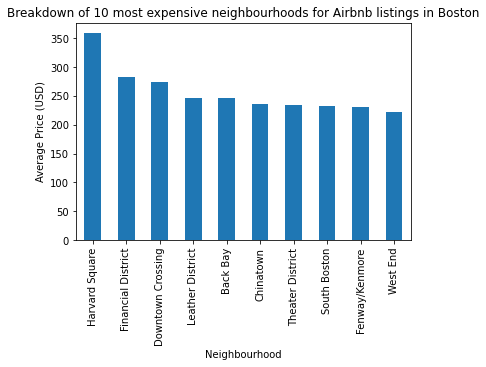

In [15]:
# Grouping nieghborhood by price and sorting to obtain 10 most expensive neighbourhoods 
price_nb = (df_nb.groupby(['neighbourhood']).mean()['price'].sort_values(ascending=False)[:10])
price_nb.plot(kind='bar');
plt.title('Breakdown of 10 most expensive neighbourhoods for Airbnb listings in Boston');
plt.ylabel('Average Price (USD)');
plt.xlabel('Neighbourhood');
plt.savefig('listing_expense_location.png', dpi=300, bbox_inches='tight')

In [16]:
'''
Question 4 - Simple ML model to predict average nightly price by certain variables in df_ml data set
'''

# Will copy dataframe to df_ml and filter out input variable and response variable columns of interest.
# Looking to meausure response of average nightly price
df_ml = df.copy()
df_ml = df_ml[['host_response_rate','bedrooms','bathrooms','number_of_reviews','availability_365','property_type','minimum_nights','price']]
df_ml.head()

,host_response_rate,bedrooms,bathrooms,number_of_reviews,availability_365,property_type,minimum_nights,price
0,NaN,2.0,1.5,0,0,House,2,$250.00
1,100%,1.0,1.0,36,359,Apartment,2,$65.00
2,100%,1.0,1.0,41,319,Apartment,3,$65.00
3,100%,1.0,1.0,1,98,House,1,$75.00
4,100%,1.0,1.5,29,334,House,2,$79.00


In [17]:
# Convert price from object to float
df_ml1 = df_ml.copy()
df_ml1['price'] = df_ml1['price'].replace({'\$': '',',':''}, regex = True).astype(float)

In [18]:
# Find out average null values by columns to determine whether to impute or drop
df_ml1.isnull().mean()

host_response_rate    0.131381
bedrooms              0.002789
bathrooms             0.003905
number_of_reviews     0.000000
availability_365      0.000000
property_type         0.000837
minimum_nights        0.000000
price                 0.000000
dtype: float64

In [19]:
# Will drop property type nan values since percentage nan of 0.08% too low to significantly influence model
df_ml2 = df_ml1.dropna(subset = ['property_type'], axis = 0)

In [20]:
# Convert percentage string values in 'host_response_rate' to float values
df_ml3 = df_ml2.copy()
df_ml3['host_response_rate'] = (df_ml3['host_response_rate'].str.replace('%','').astype(float))/100

In [21]:
# Will impute the nan values for bedrooms and bathrooms with the mode since they are categorical. Will impute the host_response rate with 1 (100%) since that is the most common value
fill_mode = lambda col: col.fillna(col.mode()[0])
df_ml3[['bedrooms','bathrooms']] = df_ml3[['bedrooms','bathrooms']].apply(fill_mode)
df_ml3['host_response_rate'] = df_ml3['host_response_rate'].fillna(1)

# Confirm no more nan values in dataframe
df_ml3.isnull().mean()

host_response_rate    0.0
bedrooms              0.0
bathrooms             0.0
number_of_reviews     0.0
availability_365      0.0
property_type         0.0
minimum_nights        0.0
price                 0.0
dtype: float64

In [22]:
# Now we need to handle categorical data in 'property type' column
df_ml3['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

In [23]:
# Given significant weight of values are apartment, house and condo we will use a custom binary encoding technique for simplicity

# Create boolean columns is_apartment, is_house and is_condo
df_ml3['is_apartment'] = np.where(df_ml3['property_type'].str.contains('Apartment'), 1, 0)
df_ml3['is_house'] = np.where(df_ml3['property_type'].str.contains('House'), 1, 0)
df_ml3['is_condo'] = np.where(df_ml3['property_type'].str.contains('Condominium'), 1, 0)
df_ml3.head() #Shows last 3 columns have been added

,host_response_rate,bedrooms,bathrooms,number_of_reviews,availability_365,property_type,minimum_nights,price,is_apartment,is_house,is_condo
0,1.0,2.0,1.5,0,0,House,2,250.0,0,1,0
1,1.0,1.0,1.0,36,359,Apartment,2,65.0,1,0,0
2,1.0,1.0,1.0,41,319,Apartment,3,65.0,1,0,0
3,1.0,1.0,1.0,1,98,House,1,75.0,0,1,0
4,1.0,1.0,1.5,29,334,House,2,79.0,0,1,0


In [24]:
# Now we can drop the property_type column in preparation for ml model
df_ml4 = df_ml3.drop('property_type', axis = 1)
df_ml4.head()

,host_response_rate,bedrooms,bathrooms,number_of_reviews,availability_365,minimum_nights,price,is_apartment,is_house,is_condo
0,1.0,2.0,1.5,0,0,2,250.0,0,1,0
1,1.0,1.0,1.0,36,359,2,65.0,1,0,0
2,1.0,1.0,1.0,41,319,3,65.0,1,0,0
3,1.0,1.0,1.0,1,98,1,75.0,0,1,0
4,1.0,1.0,1.5,29,334,2,79.0,0,1,0


In [25]:
# Now we can prepare the ML model

# Create matrix of input variables and define response variable
df_inputs = df_ml4.drop('price', axis = 1)
df_response = df_ml4['price']
X = df_inputs
y = df_response

# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 

#Predict and Score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was 0.15117350764673 on 1075 values.'

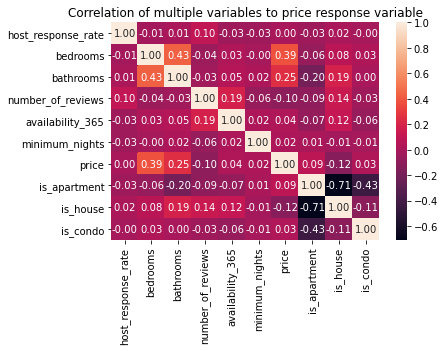

In [26]:
sns.heatmap(df_ml4.corr(), annot=True, fmt=".2f");
plt.title('Correlation of multiple variables to price response variable')
plt.savefig('correlation_heat_map.png', dpi=300, bbox_inches='tight')